orig


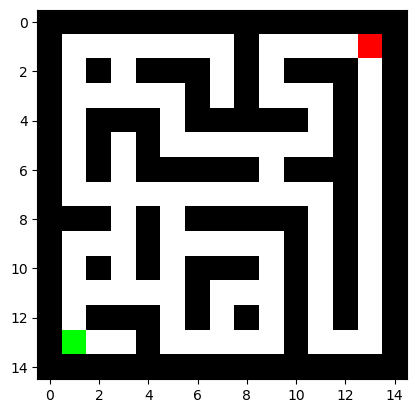

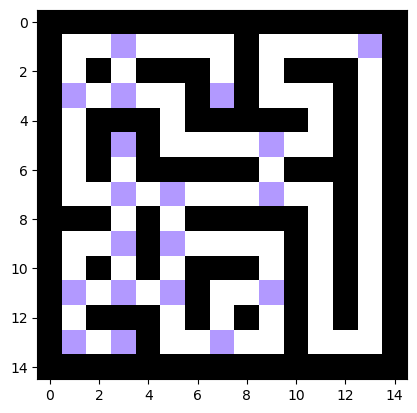

[(3+1j), (13+1j), (1+3j), (3+3j), (7+3j), (3+5j), (9+5j), (3+7j), (5+7j), (9+7j), (3+9j), (5+9j), (1+11j), (3+11j), (5+11j), (9+11j), (1+13j), (3+13j), (7+13j)]
cycles: 64


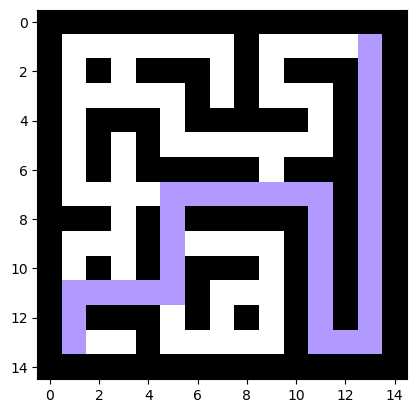

7036

test1: 7036 7036
orig
cycles: 22586542 00

part1: 133584 133584
orig


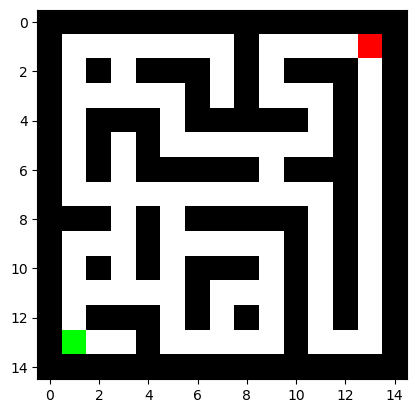

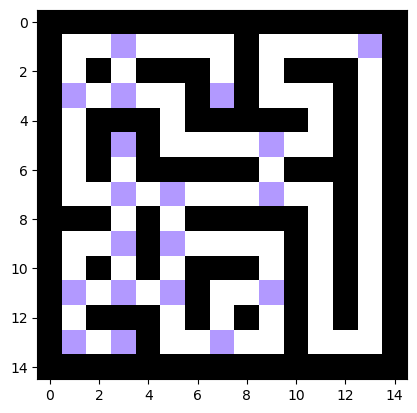

[(3+1j), (13+1j), (1+3j), (3+3j), (7+3j), (3+5j), (9+5j), (3+7j), (5+7j), (9+7j), (3+9j), (5+9j), (1+11j), (3+11j), (5+11j), (9+11j), (1+13j), (3+13j), (7+13j)]
cycles: 64


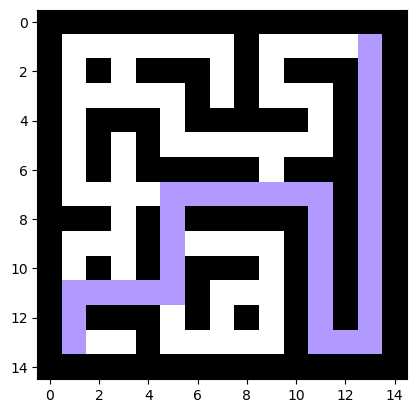

7036
cycles: 65


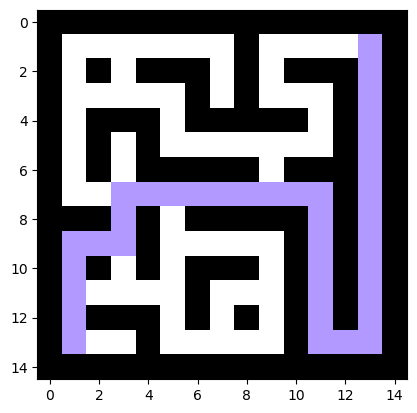

7036
cycles: 66


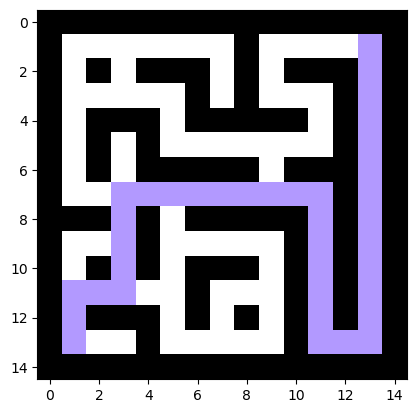

7036
there are 3 best

test2: 45 45
orig
cycles: 22586542 00
cycles: 22588
cycles: 22590
cycles: 22592
cycles: 22594
cycles: 22596
cycles: 22598
cycles: 22600
cycles: 22602
cycles: 22604
cycles: 22606
cycles: 22608
there are 12 best

part2: 622 1


In [1]:
from functools import lru_cache
from matplotlib import pyplot as plt
import numpy as np

start = None
goal = None

def render(M,hl=None):
    
                
    
    image = np.zeros((M["h"], M["w"], 3))
    for p in M["map"].keys():
        x=int(p.real)
        y=int(p.imag)
        c=M["map"][p]
        if c==".":
            col=[1,1,1]
        elif c=="#":
            col=[0,0,0]
        else:
            col=[1,1,0]
        
        if p==M["start"]:
            col=[0,1,0]
        elif p==M["goal"]:
            col=[1,0,0]
            
        if hl:
            if p in hl:
                #print(p,hll.index(p),hll[hll.index(p)])
                col=[0.7,0.6,1]
         
        
        
        
        image[y,x,:]=col
        
        
    plt.imshow(image)
    plt.show()

def p1(fn,dbg=0,part=1):
    M={}
    M["turncost"]=1000
    M["movecost"]=1
    M["map"]={}
    M["w"]=0
    M["h"]=0
    
    adjs=[1,1j,-1,-1j]
    turns=[-1j,1,1j]
    
    def isknot(M,p):
        if M["map"][p]!=".":
            return False
        e=sum([1 if M["map"][p+a]=="." else 0 for a in adjs])
        return e in [1,3,4] or p in [M["start"],M["goal"]]
    
    
    
    
    for y,l in enumerate(open(fn).readlines()):
        for x,c in enumerate(l):
            if not c in "SE.#":
                continue
            p=y*1j+x
            M["w"]=max(M["w"],x+1)
            M["h"]=max(M["h"],y+1)
            if c=="S":
                M["start"]=p
                c="."
            if c=="E":
                M["goal"]=p
                c="."   
            M["map"][p]=c
    print("orig")
    if dbg:
        render(M)
        kn=[x if isknot(M,x) else None for x in M["map"].keys() if   isknot(M,x) ]
        render(M,kn)
        print(kn)
    
    #@lru_cache(maxsize=4096)
    def warp(M,p,d):
        #first step
        tc=M["turncost"]
        mc=M["movecost"]
        cst=mc
        p+=d
        trail=[]
        while 1:
            if isknot(M,p):
                break
                
            exits=[1 if M["map"][p+d*a]=="." else 0 for a in turns]
            trail.append(p)
            for z in range(len(turns)):
                if exits[z]:
                    d*=turns[z]
                    p+=d
                    cst+=[tc+mc,mc,tc+mc][z]
        return p,d,cst,trail
    
    
    def knots(M):
        #reduce map to knots
        K={}
        for p in M["map"].keys():
            if isknot(M,p):
                K[p]={}
                for d in adjs:
                    if M["map"][p+d]==".":
                        K[p][d]=warp(M,p,d)
                        if dbg:
                            pass
                            #render(M,K[p][d][3])
                        
        return K
    K=knots(M)
    
    
    def H(s):
        return 0
        v=s[0]-M["goal"]
        return abs(v.real)+abs(v.imag)
    
    def F(s):
        return s[2]+H(s)
    
    #pos,dir,cst,past,trail
    o=[(M["start"],1,0,None,[M["start"]])]
    h={}
    cnt=0
    
    def crp(s):
        return tuple(s[:2])
        return (s[0],s[1])
    
    solutions=[]
    
    while len(o):
        cnt += 1
        o.sort(key=lambda x: F(x))
        s=o[0]
        o=o[1:]
        #print("->",s)
        h[crp(s)]=1
        p,d,cst,past,touch=s
        if p==M["goal"]:
            print("cycles:",cnt)
            
            hl=[]
            while 1:
                p2,d2,cst2,past2,touch2=s
                for p3 in touch2:
                    hl.append(p3)
                if past2:
                    s=past2
                else:
                    break
            if dbg:
                render(M,list(set(hl)))
                print(cst)
            solutions.append((cst,hl))
            
        if len(solutions):
            if part==1:
                return solutions[0][0]
            if cst>solutions[0][0]:
                print("there are %d best"%len(solutions))
                tls=[]
                for c,t in solutions:
                    for p in t:
                        tls.append(p)
                tls=list(set(tls))
                if dbg:
                    pass
                    #render(M,tls)
                return len(tls)
        
        if (cnt)%1000==0:
            print(cnt,len(o),F(s),H(s),end="\r")
        
        
        if d in K[p]:
            pp,dd,cc,trail=K[p][d]
            s2=(pp,dd,cst+cc,s,trail+[pp])
            if not crp(s2) in h:
                o.append(s2) 
        
        for a in [-1j,1j]:
            dd=d*a
            if dd in K[p]:
                pp,dd,cc,trail=K[p][dd]
                s2=(pp,dd,cst+cc+M["turncost"],s,trail+[pp])
                if not crp(s2) in h:
                    o.append(s2) 
                
           
            
            
        
    return None
    
        
        
print("\ntest1:",p1("16.tst",1,1),7036)
print("\npart1:",p1("16.txt",0,1),133584)

print("\ntest2:",p1("16.tst",1,2),45)
print("\npart2:",p1("16.txt",0,2),1)
#610 too low


